In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt


In [3]:
def semi_a(theta,dist):
    """
    input theta in arcseconds, input distance in pc, output "a" (semimajor axis) is AU
    """
    ans = theta*dist
    return ans

In [4]:
AU_sec = 1.496e11/c

In [5]:
 1.496e11/c*4200/1e3

2095.849922949029

In [6]:
def kep_P(a,Mtot):
    """
    answer in days. 
    input "a" in AU and Mtot in solar masses.
    """
    frac = 4*pi*pi*(a*AU_sec)**3/(Mtot*s_mass)
    ans = sqrt(frac)
    return ans/60/60/24

def kep_a(P,Mtot):
    """
    answer in AU. 
    input "P" in days and Mtot in solar masses.
    """
    frac = (P*24*60*60)**2*(Mtot*s_mass)/(4*pi*pi)
    ans = frac**(1/3)
    return ans/AU_sec

In [7]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [40]:
kep_a(365.25,1) # Earth, sanity check

1.0000576845303153

In [41]:
kep_P(1,1) #Earth again, for dwindling sanity

365.21839836662093

In [42]:
data = ascii.read("ipta_3arcsec_wpm-result-CM-local.csv")

In [43]:
pms =  ascii.read("pmra_dec_GAIA.csv")

In [44]:
data

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115
str11,str28,str11,str12,str9,str11,str11,str12,str11,str12,str14,str19,str12,str11,str12,str11,str12,str16,str12,str13,str17,str13,str14,str18,str19,str15,str20,str20,str25,str24,str18,str19,str24,str28,str25,str24,str21,str25,str31,str20,str32,str23,str23,str25,str20,str17,str12,str16,str22,str27,str15,str13,str17,str23,str28,str16,str13,str17,str23,str28,str16,str24,str14,str10,str12,str10,str15,str21,str14,str16,str16,str16,str18,str11,str12,str11,str12,str11,str8,str21,str21,str7,str20,str20,str15,str28,str28,str11,str10,str23,str23,str7,str20,str20,str77,str20,str12,str10,str11,str12,str12,str12,str5,str6,str8,str11,str8,str11,str11,str11,str11,str11,str13,str14,str14
solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,ipta_wpm_oid,names,ra,dec,pmra,pmdec,dm,pepoch,posepoch,dmepoch,angdist,r_est,r_lo,r_hi,r_len,result_flag,modality_flag,angdist-arcsec,semimajor-axis
1.63572E+18,Gaia DR2 4789864076732331648,4.78986E+18,526469615,2015.5,69.31660276,0.582326756,-47.25267778,0.738504992,8.325044168,0.677716044,12.283971,122.8637296,1.197017697,-71.16597382,1.669768175,-0.10719865,0.30817017,-0.13529737,0.3569604,0.24767695,0.4017074,-0.29011166,0.1647735,0.040686335,-0.48158062,168,0,167,1,0.30433777,166.8592,0,0,31,FALSE,0.03673703,1.676063374,0.183407835,-0.045911558,20,16,1.6285695,0,21,FALSE,178,129.2994962,1.076756097,120.082436,20.409374,16,54.59060883,6.523782872,8.367938,21.008593,21,132.0143904,8.906934103,14.82153,19.460367,1.4431998,0,1.5482254,0.59921837,0.94900703,--,--,0,--,--,--,NOT_AVAILABLE,253.3946297,-41.96313675,50.46873937,-67.87315632,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,http://geadata.esac.esa.int/data-server/datalink/links?ID=478986407673233

In [45]:
# plotting GAIA RA, DEC and errors
ra_col = np.array(data[5][:])
ra_err = np.array(data[6][:])
#dec_col = np.array(data[7][:])
#dec_err = np.array(data[8][:])

In [46]:
dec_err = [0.738504992, 0.302546482, 0.392656637, 2.010098257, 0.623526292, 0.165511548] #HACK

In [47]:
dec_col = [-47.25267778, 53.11726303, -7.322165289, -50.8166163, 12.94037301, 29.14538275] #HACK

In [48]:
dec_err = np.array(dec_err)
dec_col = np.array(dec_col)

In [49]:
# plotting RA, DEC and errors
ra_col =  ra_col[1:].astype("float64")
ra_err = ra_err[1:].astype("float64")
#dec_col = dec_col[1:].astype("float64")
#dec_err = dec_err[1:].astype("float64")

In [50]:
# PTA RA and DEC
PTAra = [69.31657736, 153.1393298, 156.1610927, 263.1990267, 287.540423, 298.8661475]
PTAdec = [-47.2526679, 53.11726643, -7.32213921, -50.81673894, 12.94040243, 29.14539911]

In [51]:
PTAra = np.array(PTAra)
PTAdec = np.array(PTAdec)

In [52]:
# Plot position with errors x10 so we can see them

/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


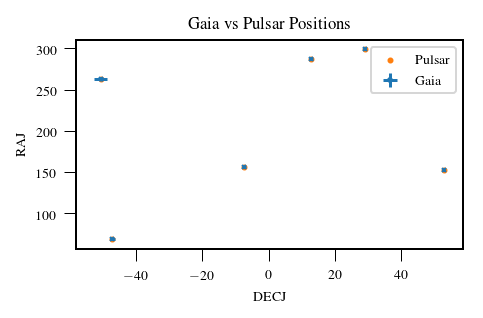

In [53]:
plt.figure()
plt.scatter(PTAdec, PTAra, color = "C1", label = "Pulsar")
plt.errorbar(dec_col, ra_col, xerr=dec_err, yerr=ra_err, fmt='x', color = "C0", label = "Gaia")
plt.xlabel("DECJ")
plt.ylabel("RAJ")
plt.tight_layout()
plt.legend()
plt.title("Gaia vs Pulsar Positions")
plt.savefig("xmatched_WDs_with_RADEC_errorsX10+PTA.pdf")

In [54]:
pms[0][:]

pmra
122.8637296
2.976959985
-35.51929892
-0.031849016
-0.672057539
-3.092116051


In [55]:
# plotting GAIA proper motion
pmra_col = np.array(pms[0][:])
pmra_err = np.array(pms[1][:])
pmdec_col = np.array(pms[2][:])
pmdec_err = np.array(pms[3][:])

In [56]:
pmra_col = pmra_col[1:].astype("float64")
pmra_err = pmra_err[1:].astype("float64")
pmdec_col = pmdec_col[1:].astype("float64")
pmdec_err = pmdec_err[1:].astype("float64")

In [57]:
# plotting PTA proper motion
PTApmra_col = np.array(pms[5][:])
PTApmra_err = np.array(pms[6][:])
#PTApmdec_col = np.array(pms[7][:])
#PTApmdec_err = np.array(pms[8][:])

In [58]:
PTApmdec_col = [-71.47620158, -25.45880892, -48.24394017, -9.909960846, -6.934721358, -4.065468091]

In [59]:
PTApmdec_err  = [0, 0.02704717620756740687,0.08132521485737251310, 0.19443960756786698996, 0.28654775359790257694, 0.66213598864487832607]

In [60]:
PTApmra_col = PTApmra_col[1:].astype("float64")
PTApmra_err = PTApmra_err[1:].astype("float64")
PTApmdec_col = np.array(PTApmdec_col)
PTApmdec_err = np.array(PTApmdec_err)

In [61]:
1/3

0.3333333333333333

/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,1,'Proper motion comparison: Gaia vs Pulsar Timing')

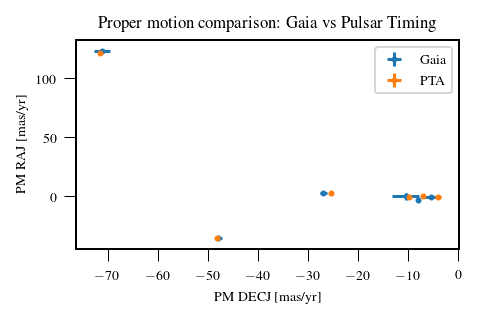

In [62]:
plt.figure()
plt.errorbar(pmdec_col, pmra_col, xerr=pmdec_err, yerr=pmra_err, fmt='o', color="C0", label = "Gaia")
plt.errorbar(PTApmdec_col, PTApmra_col, xerr=PTApmdec_err, yerr=PTApmra_err, fmt='o', color = "C1", label = "PTA")
plt.xlabel("PM DECJ [mas/yr]")
plt.ylabel("PM RAJ [mas/yr]")
plt.legend()
plt.tight_layout()
plt.title("Proper motion comparison: Gaia vs Pulsar Timing")
#plt.savefig("xmatched_WDs_with_pms.pdf")

In [63]:
pmdec_col - PTApmdec_col

array([ 0.31022776, -1.48503866,  0.31162951, -0.57310115,  1.4856086 ,
       -3.8975238 ])

In [69]:
correctTheta = 0.0003

# J1955+2908

In [70]:
# GAIA theta = 0.153068
# dist = 1739.64867812642

In [71]:
semi_a(0.156266848*correctTheta,1739.648678) # size of semimajor axis in AU based on pulsar distance (DM) and theta from GAIA

0.08155482466152808

In [72]:
kep_a(117,1.5)

0.5359437727573382

In [34]:
# parallax and error are 0.6034, 0.1942
d_est = 1/0.6034

In [35]:
sigma_d = (1/0.1942)/d_est**2 

In [36]:
sigma_d 

1.87482780638517

In [ ]:
d_est + sigma_d

# J1012+5307

In [74]:
semi_a(0.071544965*correctTheta,0.734400211678976)

1.5762791232169477e-05

In [38]:
kep_a(0.6,1.5)

0.01593784093920408

# J0437-4715

In [ ]:
semi_a(0.071544965,0.121088886192142)

In [39]:
kep_a(5.7,1.5)

0.07148998815023719

# J1744-1134

In [ ]:
semi_a(1.971,3.18833137078074) 

In [ ]:
kep_P(6,1.6) # days

In [ ]:
kep_P(6,1.6)/365 # years

In [ ]:
# Could be in a 4,000 day orbit.

# J1843-1113

In [ ]:
semi_a(theta,dist)

In [27]:
t2 = semi_a(1.485199*0.0002778328571428571,2.84349320264736)

In [28]:
yrs = kep_P(4071.842137159, 2)/365 

In [30]:
t2

0.0011733307366776575

In [ ]:
kep_P(t2,1.6) # days 

In [ ]:
kep_P(t2,1.6)/365 # years

In [ ]:
# Could be in a 2,500 day orbit. Need to follow up with GAIA data parallax measurements

In [11]:
# a = 4071.842137159  AU

# J1939+2134

In [ ]:
t1939 = semi_a(2.138534,4.77262010957524)

In [ ]:
kep_P(t1939,1.6) # days

In [ ]:
kep_P(t1939,1.6)/365 # years

# J1910+1256

In [41]:
t1910 = semi_a(1.052658208, 4.77262010957524)

In [42]:
kep_a(t1910,1.5)

0.0002822492220806645

In [43]:
t1910

0.0014140219414533633

In [ ]:
# So if I need to divide 1910 by 7200, and 1955 by 412, what is correct for 1910??

In [ ]:
# Could be in ~1,000 - 30,000 year orbit or longer

# J1732-5049

In [46]:
kep_a(5.2629972182993119438,1.5)

0.06778767650885477

# J1024-0719

In [47]:
kep_a(2000*365,2.0) # P = 2 to 20 kyr

199.92025953413096

In [10]:
0.857824/3600 # minutes to arcseconds


0.00023828444444444445

In [9]:
semi_a(0.00023828443777248 ,1891.0741301059)

0.45061353587836606

In [ ]:
0.45 AU

In [11]:
semi_a(0.857824 ,1891.0741301059)

1622.2087745839635

In [14]:
kep_P(semi_a(0.857824/3600 ,2000),2)

84.96228444306203

In [15]:
78 day binary orbit. 

SyntaxError: invalid syntax (<ipython-input-15-86539bf80329>, line 1)